### Process survey and produce smooth shear fields and bootstrap covariances

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from os.path import expanduser
from pickle import dump, load

from wlenet import config
from wlenet.misc.gpu import avoid_gpu_in_this_process; avoid_gpu_in_this_process()
from wlenet.cluster.cluster_lensing import ClusterLensing
from wlenet.cluster.cluster_survey import ClusterSurvey
from wlenet.cluster.shear_stamps import ShearEstimatorCnn, ShearEstimatorRrg
from wlenet.cluster.shear_fields import ShearFieldEstimator
from wlenet.cluster.figures import show_survey_shear_fields
from wlenet.models.utils import load_spec, save_spec, print_spec

In [2]:
model_spec_rrg = load_spec('rrg')
model_spec_cnn = load_spec('cnn_image_clash_uniform_mse_lsq')
load_survey = False
save_survey = True
save_figures = True
seed = 1234

In [3]:
sse_names = ['cat', 'rrg', 'cnn']
stamp_shear_estimators = {'rrg': ShearEstimatorRrg(model_spec_rrg), 'cnn': ShearEstimatorCnn(model_spec_cnn)}
field_shear_estimators = {'r_smoothing_30': ShearFieldEstimator(sse_names=sse_names, r_smoothing=30.0, 
                                                                bootstrap_iters=100, seed=seed)}

In [4]:
np.random.seed(seed)

In [5]:
%%capture
if load_survey:
    with open(expanduser(config['cache_path'] + '/clash_fields_survey.pkl'), 'rb') as f:
        survey = load(f)
else:
    survey = ClusterSurvey(ClusterLensing(cut_params={'apply_extra_cut': True}, 
                                          stamp_shear_estimators=stamp_shear_estimators,
                                          field_shear_estimators=field_shear_estimators))
    survey.process_survey()
    survey.remove_tmp_files()

if save_survey:
    with open(expanduser(config['cache_path'] + '/clash_fields_survey.pkl'), 'wb') as f:
        dump(survey, f)

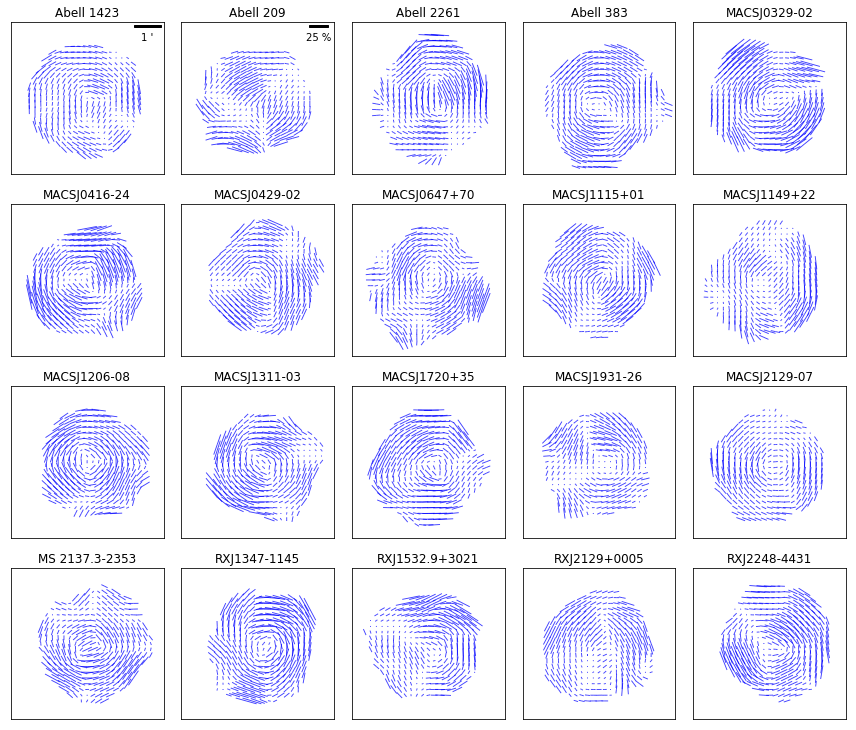

In [6]:
show_survey_shear_fields(survey, sse_name='cnn', sfe_name='r_smoothing_30')

if save_figures:
    fig_path = expanduser(config['figure_path'] + '/estimation/clash_wl_rrg_cnn_quiver_mag.pdf')
    plt.savefig(fig_path)